<a href="https://colab.research.google.com/github/ibrahimkarakose/20-21-Spring-Semester-Personal-Studies-/blob/main/2DTrussSystemAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

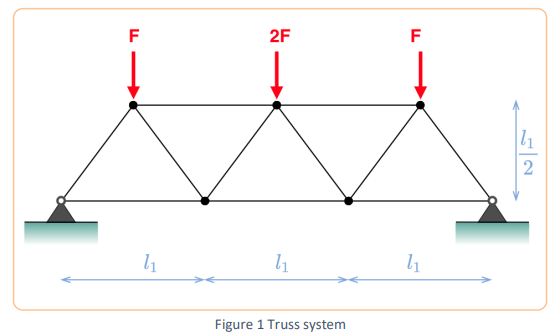

-2D Truss System Basic Structural Analysis-

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#My parameters
l=8 #m
h=l/2 #m
SD=7 #cm
F=12 #kN
E=32 #GPa
A= (math.pi*SD**2*l) 
a = 60*(math.pi/180)


In [3]:
#Acknowledgments

DOF = 2

In [ ]:
#Conversions

E1 = E*10**3   #GPa to MPa
l1 = l*1000     #m to mm
F1 = F*1000    #kN to N
#fy = F *  math.sin(a)
#fx = F * math.cos(a)
print(E1, l1, F1)

In [5]:
#Local stiffness matrix of frame members
def lsme(x1,y1,x2,y2,E,A):   #local stiffness matrix of elements will be coded as lsme from now on.
        L=math.sqrt(((x2-x1)**2)+((y2-y1)**2))
        c=float((x2-x1)/L)
        s=float((y2-y1)/L)
        K_lsme=(E1*A/L)*(np.array([[c**2,c*s,-c**2,-c*s],
                             [c*s,s**2,-c*s,-s**2],
                             [-c**2,-c*s,c**2,c*s],
                             [-c*s,-s**2,c*s,s**2]]))
        return(K_lsme)

In [6]:
#Creating the coordinates of finite elements (frames) and nodes

nodes={1:[0,0],2:[(l*math.cos(a)),(l*math.sin(a))],
       3:[l,0],4:[l*(math.cos(a)+1),(l*math.sin(a))],5:[(2*l),0],
       6:[l*(math.cos(a)+2),(l*math.sin(a))],7:[(3*l),0]}

In [7]:
frames={1:[1,2],2:[1,3],3:[2,3],4:[2,4],
        5:[3,4],6:[3,5],7:[4,5],8:[4,6],
        9:[5,6],10:[5,7],11:[6,7]}


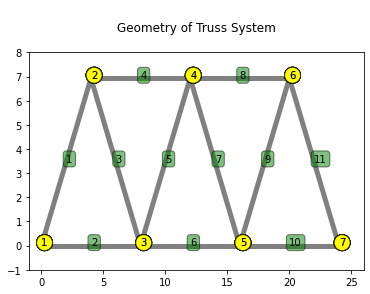

In [8]:
#Drawing the System Geometry

for item in frames.keys():
    plt.plot([(nodes[frames[item][0]][0]),(nodes[frames[item][1]][0])],
             [(nodes[frames[item][0]][1]),(nodes[frames[item][1]][1])],
             lw=5, c="gray")
    for dot in nodes.keys():
        plt.annotate(dot, xy=(nodes[dot][0], nodes[dot][1]),
                     xytext=(nodes[dot][0], nodes[dot][1]),
            bbox=dict(boxstyle="circle",alpha=0.5,fc="yellow"),) #nodes

for member_name in frames.keys():
    x=((nodes[frames[member_name][1]][0])+(nodes[frames[member_name][0]][0]))/2
    y=((nodes[frames[member_name][1]][1])+(nodes[frames[member_name][0]][1]))/2
    plt.annotate(member_name, xy=(x,y), xytext=(x,y),
        bbox=dict(boxstyle="round",alpha=0.5,fc="green"),) #frames


    
   
plt.title("\n"'Geometry of Truss System'"\n")
plt.xlim(-1,26)
plt.ylim(-1,8)
plt.show()

In [ ]:
#CALCULATION OF LOCAL STIFFNESS MATRICES OF ELEMENT  
#general stiffness matrix of elements will be coded as "gsme" from now on. 

K_gsme={}
for item in frames.keys():
    K_gsme[item]=lsme((nodes[frames[item][0]][0]),(nodes[frames[item][0]][1]),
             (nodes[frames[item][1]][0]),(nodes[frames[item][1]][1]),E,A)
    print("\n",20*"=","{}. Element Local stiffness matrix:".format(item),20*"=","\n")
    #print("{}. element local stiffness matrix: \n".format(item))
    print(np.around(K_gsme[item],3))

In [10]:
# CALCULATION OF GENERAL STIFFNESS MATRIX DIMENSIONS
#general stiffness matrix dimensions will be coded as "gsmd" from now on.   
#general stiffness matrix  will be coded as "gsm" from now on.
K_gsmd = DOF * len(nodes)
K_gsm = np.zeros((K_gsmd,K_gsmd))
#print(K_gsm)


In [11]:
#MAPPING AND CREATING THE GENERAL STIFFNESS MATRIX
#system general stiffness matrix will be coded as "sgsm" from now on.
#node names will be coded as "nn" from now on.    
def sgsm (K_gsme,nn,DOF,K_gsmd):
    K_virtual = np.zeros((K_gsmd,K_gsmd))
    # i,i 
    index = nn[0] * DOF - DOF 
    K_virtual[ index:index+DOF,index:index+DOF]=K_gsme[ 0 : DOF  , 0 : DOF ]
    # i,j
    index_2 = nn[1] * DOF - DOF 
    K_virtual[ index:index+DOF,index_2:index_2+DOF]=K_gsme[ 0 :DOF,DOF:DOF+DOF]
    # j,i
    K_virtual[ index_2:index_2+DOF,index:index+DOF]=K_gsme[DOF:DOF+DOF,0:DOF]
    # j,j
    index = nn[1] * DOF - DOF 
    K_virtual[ index:index+DOF,index:index+DOF]=K_gsme[DOF:DOF+DOF,DOF:DOF+DOF]
    return( K_virtual )

In [12]:
# CALCULATION OF GENERAL STIFFNESS MATRIX
for item in frames.keys():
    K_gsm += sgsm( K_gsme[item], frames[item], DOF , K_gsmd )

In [13]:
#LIMIT CONDITIONS
#It'll be coded as "lc" from now on.
#Limit conditions of general stiffness matrix will be coded as "lcgsm" from now on.

lc=np.array([0,0,1,1,1,1,0,0,1,1,1,1,1,1])


K_lcgsm=K_gsm.copy()
for item,value in enumerate(lc):
    if value==0:
        K_lcgsm[item,:]=0
        K_lcgsm[:,item]=0
        K_lcgsm[item,item]=1

In [14]:
#CALCULATION OF DISPLACEMENT "P0"

P0=np.array([[0],[0],[0],[0],[0],[0],[0],[0],[0],[-F],[0],[-2*F],[0],[-F]])

In [15]:
#P0 VECTOR REDUCED TO LIMIT CONDITIONS FOR ANALYSIS

P0_lc=P0.copy()
for item,value in enumerate(lc):
    if value==0:
        P0_lc[item]=0


In [ ]:
#CALCULATION OF SYSTEM DISPLACEMENT VECTOR
#Displacement vector will be coded as "dv" from now on.
U_dv=np.linalg.solve(K_lcgsm,P0_lc)
print("SYSTEM DISPLACEMENT UNDER HORIZONTAL LOADS")
print(np.round(U_dv,5))
print("\n"+"="*45)

In [ ]:
#SUPPORT REACTIONS AND LOAD VECTORS OF THE SYSTEM
#P system will be coded as "Ps"
Ps=K_gsm.dot(U_dv)
print("SYSTEM DISPLACEMENT UNDER HORIZONTAL LOADS")
print(np.around(Ps))
print("\n"+"="*43)


In [18]:
#TRANSFORMATION OF THE GENERAL DISPLACENT VECTOR OF THE SYSTEM TO THE ELEMENT GENERAL VECTOR

#element global displacement vector will be coded as "egdv".
#vector will be coded as "vec".
egdv={}
for item in frames.keys():
    vec=np.zeros([4,1])
    i=frames[item][0]
    j=frames[item][1]
    vec[0]=U_dv[(i*DOF)-2]
    vec[1]=U_dv[(i*DOF)-1]
    vec[2]=U_dv[(j*DOF)-2]
    vec[3]=U_dv[(j*DOF)-1]
    egdv[item]=vec

In [19]:
#TRANSFORMATION OF THE ELEMENT GENERAL DISPLACEMENT VECTOR TO THE ELEMENT LOCAL DISPLCEMENT
#element local displacemnet vector will be coded as "eldv".
eldv={}
for item in frames.keys():
  eldv[item]=egdv[item]

In [20]:
#CREATION OF THE ELEMENT LOCAL LOAD VECTOR

el2v={}
for item in frames.keys():
    stage1=(K_gsme[item].dot(eldv[item]))
    eldv[item]=stage1

In [ ]:
#internal forces will be coded as "ifo".

for item in frames.keys():
  x=eldv[item][0]
  if x>0:
    sign=("-")
  
  else:
    sign=("+")
    P_ifo=((eldv[item][0])**2+(eldv[item][1])**2)**0.5
    
  print("AXIAL FORCES")
  print("{}.element of axial force:".format(item))
  print(str(sign),float(np.around(P_ifo,2)))

In [ ]:
Shear_1 = (Ps[0]/A)

Normal_1 = (Ps[1]/A)

Shear_2 = (Ps[7]/A)

Normal_2 = (Ps[8]/A)

print(Shear_1, Normal_1, Shear_2, Normal_2)
